# Univariate Linear Regression

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Reading the dataset

In [2]:
file = open("./Dataset/ex1data1.txt", "r")

train_data = []
train_data_labels = []

for x in file:
    line = x.split(",")
    # converting string to float
    train_data.append(float(line[0]))
    train_data_labels.append(float(line[1]))

In [3]:
total_samples = len(train_data)

print("Total number of samples: " + str(total_samples))

Total number of samples: 97


## Visualizing the dataset

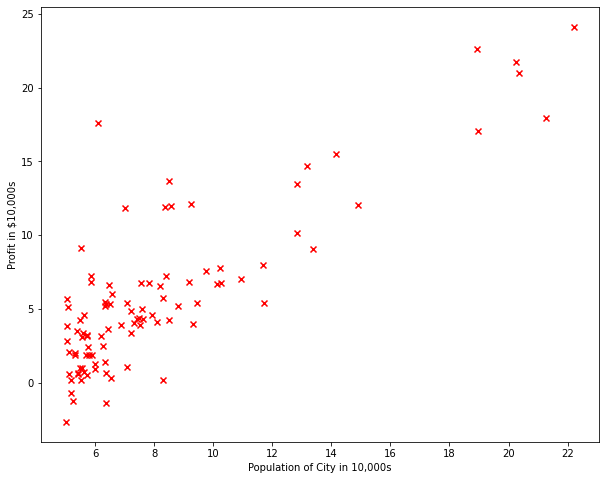

In [4]:
plt.figure(figsize=(10,8))

# adjusting ranges and interval of x and y axis
plt.xticks(np.arange(4, 25, 2))
plt.yticks(np.arange(-5, 26, 5))

# scatter plot
plt.scatter(train_data, train_data_labels, marker = "x", c = "red")

# labelling the x and y axis
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

# plotting the graph
plt.show()

## Cost Function

In [5]:
def calc_cost(thetas, x, y, m):
    summation = 0
    for i in range(total_samples):
        summation += ((thetas[0] + thetas[1]*x[i] - y[i]) ** 2)
    
    cost = summation / (2*m)
    return cost

## Gradient Descent

Computing partial derivative of J with respect to theetas (0 and 1)

In [6]:
# parameters
alpha = 0.02

# initializing thetas with 0
thetas = [0, 0]

# maximum number of iterations
iterations = 1500

In [7]:
# calculating derivate with respect to theta 0
def deriv_theta_0(thetas, x, y, m):
    summation = 0

    for i in range(m):
        summation += thetas[0] + thetas[1]*x[i] - y[i]
    
    summation = summation / m
    return summation

In [8]:
# calculating derivative with respect to theta 1
def deriv_theta_1(thetas, x, y, m):
    summation = 0

    for i in range(m):
        summation += ((thetas[0] + thetas[1]*x[i] - y[i]) * x[i])
    
    summation = summation / m
    return summation

## "Batch" Gradient descent algorithm

In [9]:
def batch_gradient_descent(iterations, alpha, train_data, train_data_labels, total_samples, thetas):
    cost = calc_cost(thetas, train_data, train_data_labels, total_samples)
    i = 0
    
    while(cost >= 0 and i <= iterations):
        temp0 = thetas[0] - alpha*(deriv_theta_0(thetas, train_data, train_data_labels, total_samples))
        temp1 = thetas[1] - alpha*(deriv_theta_1(thetas, train_data, train_data_labels, total_samples))

        thetas[0] = temp0
        thetas[1] = temp1
        cost = calc_cost(thetas, train_data, train_data_labels, total_samples)
        
        i+=1
    
    return thetas

In [10]:
new_thetas = batch_gradient_descent(iterations, alpha, train_data, train_data_labels, total_samples, thetas)

print(new_thetas)

[-3.878201297937521, 1.1912675846584744]


## Plotting the best fit line

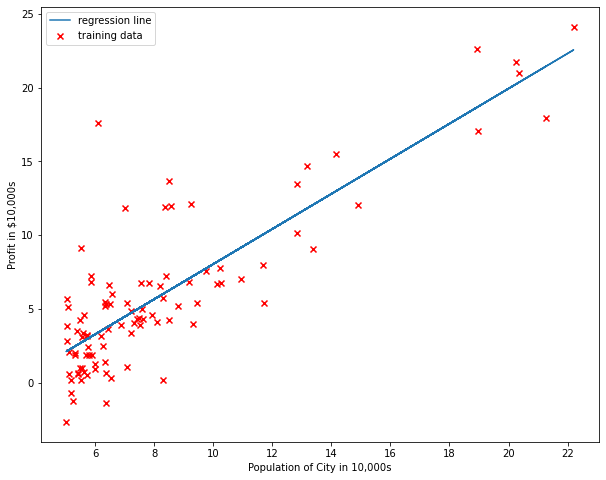

In [11]:
plt.figure(figsize=(10,8))

# adjusting ranges and interval of x and y axis
plt.xticks(np.arange(4, 25, 2))
plt.yticks(np.arange(-5, 26, 5))

plt.scatter(train_data, train_data_labels, marker = "x", c = "red", label = 'training data')

# labelling the x and y axis
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

m = new_thetas[1]
c = new_thetas[0]

train_data= np.array(train_data)

plt.plot(train_data, m*train_data + c, label = 'regression line')

plt.legend(loc='best')
plt.show()